# Evaluate the results
Here we are going to evaluate the results of the simulation. Mainly We are going to plot some graphs to see the differences between the different schemes.

## Import the datas and libraries
Let's first have the datas and the libraries we are going to use.

In [21]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
# import the datas
folder = "lab_computer_results/"
partial_results_file = folder + "partially_homomorphic_encryption_scheme_results.json"
# import the datas of partial homomorphic encryption
neighborhoods = []
for i in range(8):
    neighborhoods.append(f'nh{i}')

metrics = ['global_blockchain_size',
           'local_blockchain_size',
           'traffic_log_size',
           'traffic_block_size',
           'calculating_traffic_log_encryption_time',
           'calculating_encrypted_average_time',
           'calculating_decryption_time',
           'sending_traffic_logs_time']

log_counts = [1, 5, 10, 20, 30, 40, 60, 80, 100, 150, 200]

# create an empty dataframe with first index equal neighborhoods and second index equal log counts and columns equal metrics
partial_datas = pd.DataFrame(index=pd.MultiIndex.from_product([neighborhoods, log_counts]), columns=metrics)
# read results to a dictionary
partial_results_dict = json.load(open(partial_results_file, 'r'))
# fill the dataframe with the results
for neighborhood in neighborhoods:
    for log_count in log_counts:
        for metric in metrics:
            partial_datas.loc[(neighborhood, log_count), metric] = partial_results_dict[neighborhood][str(log_count)][metric]
partial_datas

global_blockchain_size local_blockchain_size traffic_log_size  \
nh0 1                     5547                  7631             1980   
    5                     5488                 15489             1979   
    10                    5548                 25442             1979   
    20                    5464                 45148             1978   
    30                    5476                 64955             1979   
...                        ...                   ...              ...   
nh7 60                  327222                446085             1980   
    80                  321218                479678             1979   
    100                 321104                531033             1980   
    150                 321275                618315             1980   
    200                 321242                717250             1979   

        traffic_block_size calculating_traffic_log_encryption_time  \
nh0 1                 2011                                0.230713   
    5                 2012                                0.228455   
    10                2013                                0.225683   
    20                2012                                0.228169   
    30                2012                                0.225428   
...                    ...                                     ...   
nh7 60              154033                                0.227326   
    80              154048                                0.225081   
    100             154011                                0.228574   
    150             154059                                0.226083   
    200             154051                                0.226155   

        calculating_encrypted_average_time calculating_decryption_time  \
nh0 1                             0.483075                    0.071022   
    5                             0.478047                     0.07055   
    10                            0.481013                    0.070413   
    20                            0.481401                    0.070994   
    30                            0.478122                    0.070009   
...                                    ...                         ...   
nh7 60                           55.171062                   12.090946   
    80                            54.98961                   10.663747   
    100                          55.327514                   12.079719   
    150                          54.820553                   13.386191   
    200                          55.356772                     12.0902   

        sending_traffic_logs_time  
nh0 1                    0.230983  
    5                    1.142269  
    10                   2.263887  
    20                   4.548712  
    30                   6.739546  
...                           ...  
nh7 60                  13.578178  
    80                   18.04707  
    100                 22.839542  
    150                 33.815902  
    200                 45.357075  

[88 rows x 8 columns]

In [25]:
# import the datas of single blockchain scheme
single_blockchain_results_file = folder + "single_blockchain_scheme_results.json"
metrics = ['calculating_average_traffic_time',
           'average_traffic_block_size',
           'blockchain_data_size',
           'sending_traffic_logs_time']
# create an empty dataframe with first index equal neighborhoods and second index equal log counts and columns equal metrics
single_blockchain_datas = pd.DataFrame(index=pd.MultiIndex.from_product([neighborhoods, log_counts]), columns=metrics)
# read results to a dictionary
single_blockchain_results_dict = json.load(open(single_blockchain_results_file, 'r'))
# fill the dataframe with the results
for neighborhood in neighborhoods:
    for log_count in log_counts:
        for metric in metrics:
            single_blockchain_datas.loc[(neighborhood, log_count), metric] = single_blockchain_results_dict[neighborhood][str(log_count)][metric]
single_blockchain_datas

calculating_average_traffic_time average_traffic_block_size  \
nh0 1                           0.000052                         89   
    5                            0.00006                         89   
    10                          0.000056                         89   
    20                          0.000066                         89   
    30                          0.000075                        102   
...                                  ...                        ...   
nh7 60                          0.002811                       1599   
    80                          0.003644                       1662   
    100                         0.004571                       1720   
    150                         0.006055                       1748   
    200                         0.006112                       1839   

        blockchain_data_size sending_traffic_logs_time  
nh0 1                    207                   0.00004  
    5                    529                  0.000217  
    10                   935                  0.000353  
    20                  1745                  0.000633  
    30                  2565                  0.000918  
...                      ...                       ...  
nh7 60                  6569                  0.000664  
    80                  8285                  0.000513  
    100                 9972                  0.000614  
    150                14135                  0.000858  
    200                18326                  0.001302  

[88 rows x 4 columns]

In [30]:
two_blockchain_results_file = folder + "two_blockchains_scheme_results.json"
metrics = ['calculating_average_traffic_time',
           'average_traffic_block_size',
           'local_blockchain_data_size',
           'global_blockchain_data_sze',
           'sending_traffic_logs_time']
# read the datas of two blockchain scheme to a dictionary
two_blockchain_results_dict = json.load(open(two_blockchain_results_file, 'r'))
# create an empty dataframe with first index equal neighborhoods and second index equal log counts and columns equal metrics
two_blockchain_datas = pd.DataFrame(index=pd.MultiIndex.from_product([neighborhoods, log_counts]), columns=metrics)
# fill the dataframe with the results
for neighborhood in neighborhoods:
    for log_count in log_counts:
        for metric in metrics:
            two_blockchain_datas.loc[(neighborhood, log_count), metric] = two_blockchain_results_dict[neighborhood][str(log_count)][metric]
two_blockchain_datas

calculating_average_traffic_time average_traffic_block_size  \
nh0 1                           0.000055                         65   
    5                           0.000071                         66   
    10                          0.000054                         66   
    20                          0.000067                         67   
    30                          0.000077                         66   
...                                  ...                        ...   
nh7 60                          0.002723                       1587   
    80                          0.003831                       1583   
    100                         0.004594                       1671   
    150                         0.005489                       1723   
    200                         0.006356                       1803   

        local_blockchain_data_size global_blockchain_data_sze  \
nh0 1                          182                         88   
    5                          415                         89   
    10                         707                         89   
    20                        1286                         90   
    30                        1865                         89   
...                            ...                        ...   
nh7 60                        5209                       1610   
    80                        6383                       1606   
    100                       7665                       1694   
    150                      10677                       1746   
    200                      13728                       1826   

        sending_traffic_logs_time  
nh0 1                    0.000017  
    5                    0.000201  
    10                   0.000335  
    20                   0.000626  
    30                   0.000906  
...                           ...  
nh7 60                   0.000778  
    80                   0.001033  
    100                  0.000586  
    150                  0.000962  
    200                  0.001124  

[88 rows x 5 columns]

## All schemes global blockchain size
Here we are going to plot the global blockchain size for all the schemes for the neighborhood 0.

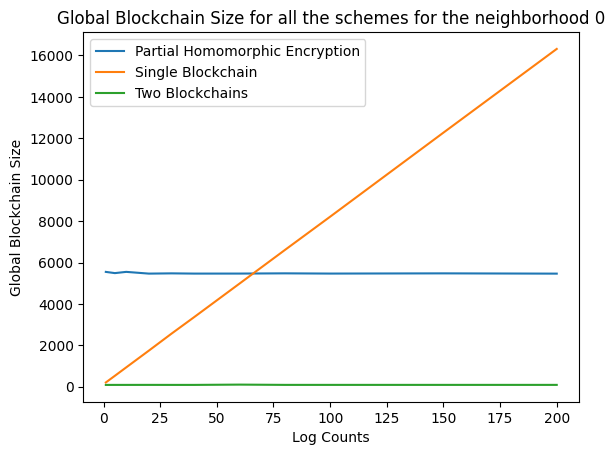

In [31]:
# plot the global blockchain size for all the schemes for the neighborhood 0 
# the x axis is the log counts and the y axis is the global blockchain size
plt.plot(log_counts, partial_datas.loc['nh0', 'global_blockchain_size'], label='Partial Homomorphic Encryption')
plt.plot(log_counts, single_blockchain_datas.loc['nh0', 'blockchain_data_size'], label='Single Blockchain')
plt.plot(log_counts, two_blockchain_datas.loc['nh0', 'global_blockchain_data_sze'], label='Two Blockchains')
plt.xlabel('Log Counts')
plt.ylabel('Global Blockchain Size')
plt.title('Global Blockchain Size for all the schemes for the neighborhood 0')
plt.legend()
plt.show()

## All schemes global blockchain size per different neighborhoods
Here we are going to plot the global blockchain size for all the schemes for all the neighborhoods given the log count 100.

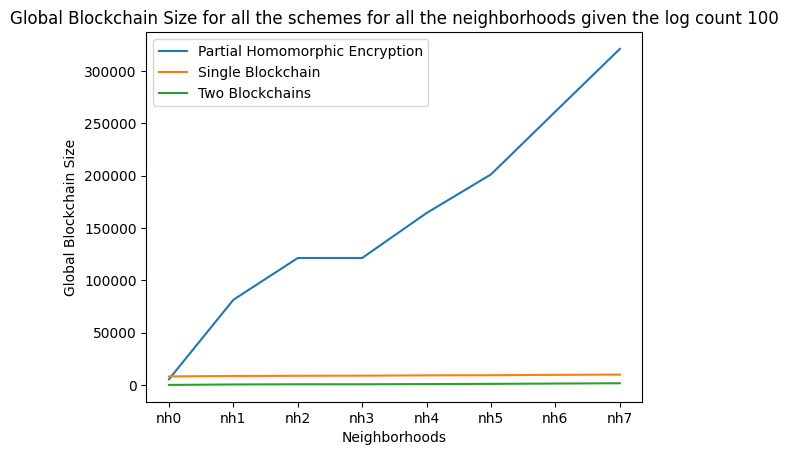

In [45]:
# plot the global blockchain size for all the schemes for all the neighborhoods given the log count 100
# the x axis is the neighborhoods and the y axis is the global blockchain size
plt.plot(neighborhoods, partial_datas.loc[(slice(None), 100), 'global_blockchain_size'], label='Partial Homomorphic Encryption')
plt.plot(neighborhoods, single_blockchain_datas.loc[(slice(None), 100), 'blockchain_data_size'], label='Single Blockchain')
plt.plot(neighborhoods, two_blockchain_datas.loc[(slice(None), 100), 'global_blockchain_data_sze'], label='Two Blockchains')
plt.xlabel('Neighborhoods')
plt.ylabel('Global Blockchain Size')
plt.title('Global Blockchain Size for all the schemes for all the neighborhoods given the log count 100')
plt.legend()
plt.show()

Show the datas of neighborhoods here in a table.

In [43]:
neighborhood_datas_file = 'graphs/neighborhoods_data.json'
neighborhood_datas = json.load(open(neighborhood_datas_file, 'r'))
# dataframe with indexes equal neighborhoods and columns equal ['vertices', 'edges']
neighborhoods_df = pd.DataFrame(index=neighborhoods, columns=['vertices', 'edges'])
for neighborhood in neighborhoods:
    neighborhoods_df.loc[neighborhood, 'vertices'] = neighborhood_datas[neighborhood]['vertex_count']
    neighborhoods_df.loc[neighborhood, 'edges'] = neighborhood_datas[neighborhood]['edge_count']
neighborhoods_df

,vertices,edges
nh0,2,1
nh1,10,20
nh2,10,30
nh3,20,30
nh4,30,40
nh5,30,50
nh6,40,65
nh7,40,80


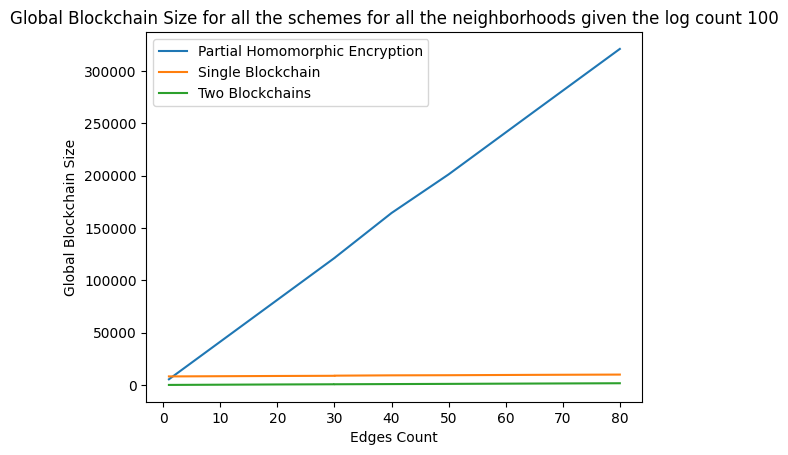

In [51]:
# show the previous plot changing the x to edges count
plt.plot(neighborhoods_df['edges'], partial_datas.loc[(slice(None), 100), 'global_blockchain_size'], label='Partial Homomorphic Encryption')
plt.plot(neighborhoods_df['edges'], single_blockchain_datas.loc[(slice(None), 100), 'blockchain_data_size'], label='Single Blockchain')
plt.plot(neighborhoods_df['edges'], two_blockchain_datas.loc[(slice(None), 100), 'global_blockchain_data_sze'], label='Two Blockchains')
plt.xlabel('Edges Count')
plt.ylabel('Global Blockchain Size')
plt.title('Global Blockchain Size for all the schemes for all the neighborhoods given the log count 100')
plt.legend()
plt.show()

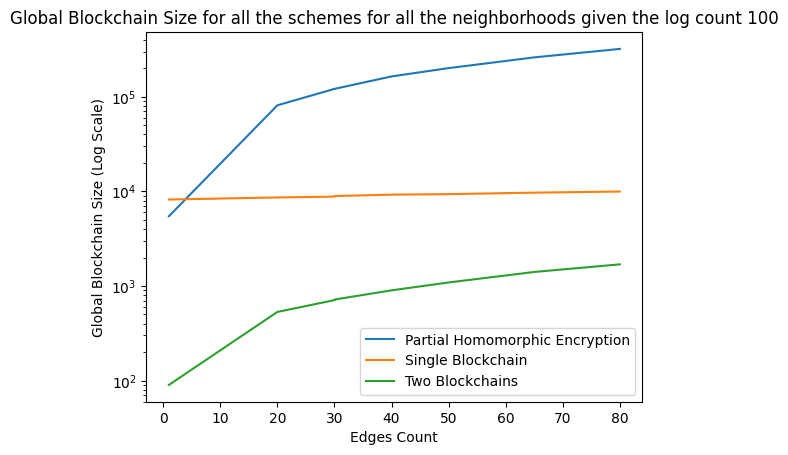

In [50]:
# show the previous plot changing the x to edges count
plt.semilogy(neighborhoods_df['edges'], partial_datas.loc[(slice(None), 100), 'global_blockchain_size'], label='Partial Homomorphic Encryption')
plt.semilogy(neighborhoods_df['edges'], single_blockchain_datas.loc[(slice(None), 100), 'blockchain_data_size'], label='Single Blockchain')
plt.semilogy(neighborhoods_df['edges'], two_blockchain_datas.loc[(slice(None), 100), 'global_blockchain_data_sze'], label='Two Blockchains')
plt.xlabel('Edges Count')
plt.ylabel('Global Blockchain Size (Log Scale)')
plt.title('Global Blockchain Size for all the schemes for all the neighborhoods given the log count 100')
plt.legend()
plt.show()

## Compare the local chain size of the partial homomorphic encryption scheme with the local chain size of the two blockchain scheme for the neighborhood 0 with different log counts

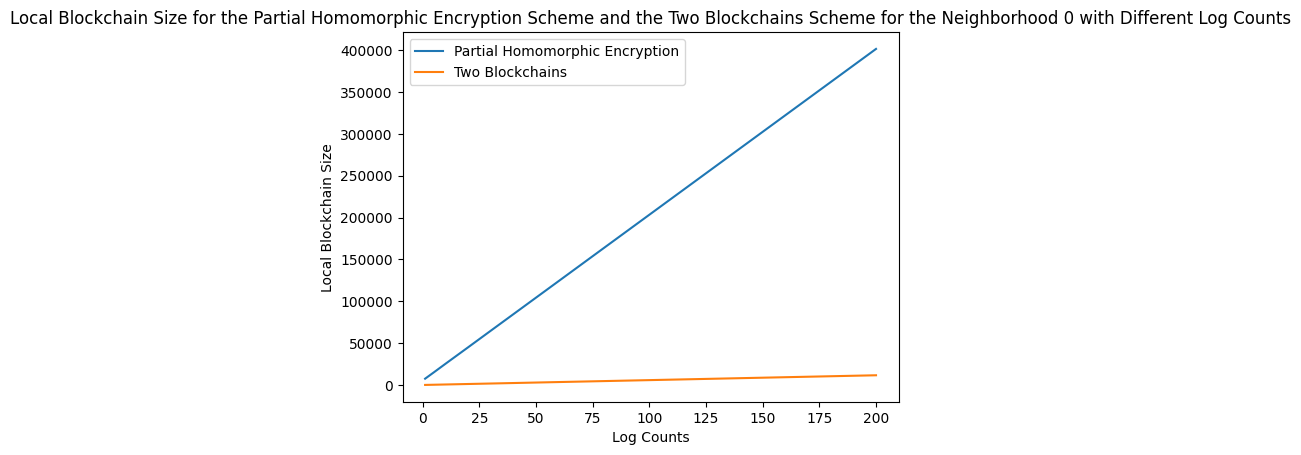

In [53]:
# plot the local blockchain size for the partial homomorphic encryption scheme and the two blockchain scheme for the neighborhood 0 with different log counts
# the x axis is the log counts and the y axis is the local blockchain size
plt.plot(log_counts, partial_datas.loc['nh0', 'local_blockchain_size'], label='Partial Homomorphic Encryption')
plt.plot(log_counts, two_blockchain_datas.loc['nh0', 'local_blockchain_data_size'], label='Two Blockchains')
plt.xlabel('Log Counts')
plt.ylabel('Local Blockchain Size')
plt.title('Local Blockchain Size for the Partial Homomorphic Encryption Scheme and the Two Blockchains Scheme for the Neighborhood 0 with Different Log Counts')
plt.legend()
plt.show()

In logarithmic scale.

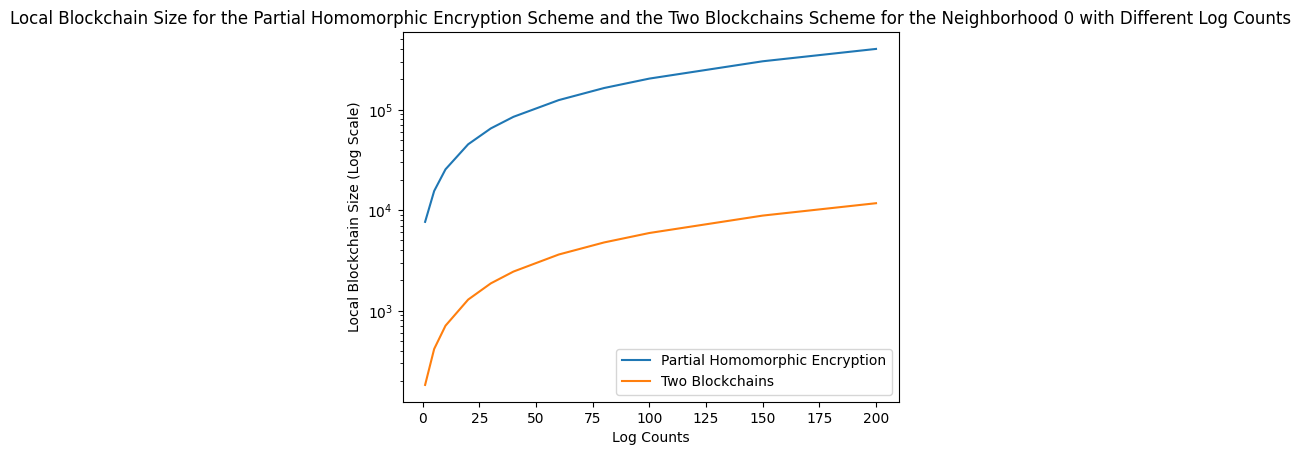

In [54]:
# plot the local blockchain size for the partial homomorphic encryption scheme and the two blockchain scheme for the neighborhood 0 with different log counts
# the x axis is the log counts and the y axis is the local blockchain size
plt.semilogy(log_counts, partial_datas.loc['nh0', 'local_blockchain_size'], label='Partial Homomorphic Encryption')
plt.semilogy(log_counts, two_blockchain_datas.loc['nh0', 'local_blockchain_data_size'], label='Two Blockchains')
plt.xlabel('Log Counts')
plt.ylabel('Local Blockchain Size (Log Scale)')
plt.title('Local Blockchain Size for the Partial Homomorphic Encryption Scheme and the Two Blockchains Scheme for the Neighborhood 0 with Different Log Counts')
(plt.legend
 ())
plt.show()